# Coding Project: Deep Learning Basics

* ### Based on the paper:K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” IEEE Conference on Computer Vision and Pattern Recognition (CVPR),2016.

* ### Assignment

  1. Get familiar with our coding environment (on cloud)!
  2. Find a codebase of this paper, download the CIFAR10 and CIFAR100 datasets
  3. Run the basic code on the server, with deep residual networks with 20, 56 and 110 layers, and obtain results (3-time average) on both CIFAR10 and CIFAR100
  4. Finish the required task and one of the optional tasks (see the following slides) –of course, you can do more than one optional tasks if you wish (bonus points)
  5. If you have more ideas, please specify a new task by yourself (bonus points)
  6. Remember: integrate your results into your reading report
  7. Submit your report(as PDF) and code (as README doc) on the iLearningX: https://ilearningx-ru.huaweiuniversity.com/courses/course-v1:HuaweiX+WHURU001+Self-paced/courseware/8825cc7815fa444696520baaf31fa2b0/77b7babd6ae34949bc209d7a8f0ba409/(8)  

Date assigned: Oct. 15, 2019;    Date Due: Dec 31, 2019

# Required Task

* The basic training and testing pipeline
    * Run the network with 20, 56 and 110 layers on CIFAR10 and CIFAR100
    * Pay attention to the hyper-parameters (learning rate, epochs, etc.)
* Questions that should be answered in the report
    * Paste complete training and testing curves and the final accuracy
    * How are your results compared to the paper? Why better or worse?
    * How is performance changing with the number of network layers? Why?
    * Any significant features that can be recognized in the curves?
    * What is the major difference between CIFAR10 and CIFAR100 results?

## Preparation
One time installation of required libraries from requirement.txt and creating data path

In [1]:
!pip install -r requirements.txt
!mkdir data

    100% |████████████████████████████████| 61kB 67.9MB/s ta 0:00:01
    100% |████████████████████████████████| 686kB 102.7MB/s ta 0:00:01
    100% |████████████████████████████████| 204kB 102.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for torchnet ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/54/7e/85/0e5071d02c5d0cf37cfd9fd437b71a2281fb71b1f89197edc5
  Running setup.py bdist_wheel for visdom ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/97/83/ee/4e0ef1aaffc3f1a81caa2bef44df43a1dd42ebcd3fbe99096e
  Running setup.py bdist_wheel for torchfile ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/3f/13/e6/01b1c6b1d3a90163bf6a9efaec1ca4a95f519220a93aa7ce81
Successfully built torchnet visdom torchfile
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --up

Downloading CIFAR10 and CIFAR100 datasets

In [2]:
from dataset.dataset_dowloader_ import *

cifar10_dowloader()
cifar100_dowloader()


Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz
Successfully download file cv-course-public/coding-1/cifar-100-python.tar.gz from OBS to local ./data/cifar-100-python.tar.gz


## The basic training and testing pipeline

* `class_values = [10, 100]` - define CIFAR10 & CIFAR100 datasets markers
* `layer_values = [[3, 3, 3], [9, 9, 9], [18, 18, 18]]` - define ResNet20 & ResNet56 & ResNet110 models
* `history_main_task = []` - define train/validation logs' container
* `auto_resnet(layer_j, class_i, 1, 180, history_main_task)`:
    * `layer_j` - iterate over ResNet20 & ResNet56 & ResNet110
    * `class_i` - iterate over CIFAR10 & CIFAR100
    * `1` - learning rate multiplier (base learning rate is 1*0.1)
    * `180` - number of epochs

In [10]:
%%time
from auto_resnet import * 

class_values = [10, 100]
layer_values = [[3, 3, 3], [9, 9, 9], [18, 18, 18]] # 20, 56, 110
history_main_task = []

for class_i in class_values:
    for layer_j in layer_values:
        auto_resnet(layer_j, class_i, 1, 180, history_main_task)

CPU times: user 15 µs, sys: 3 µs, total: 18 µs
Wall time: 22.6 µs


## Plot results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


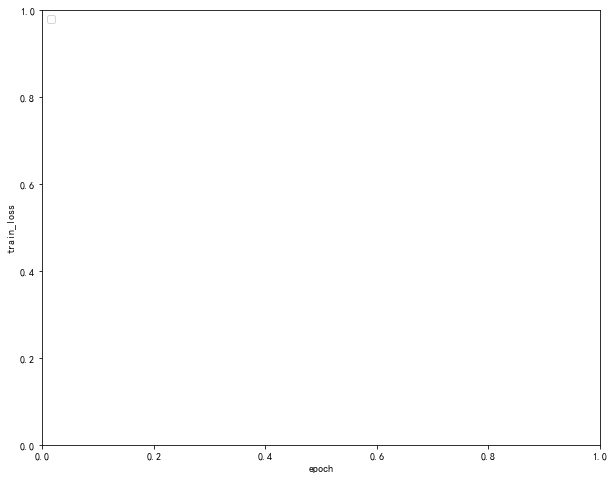

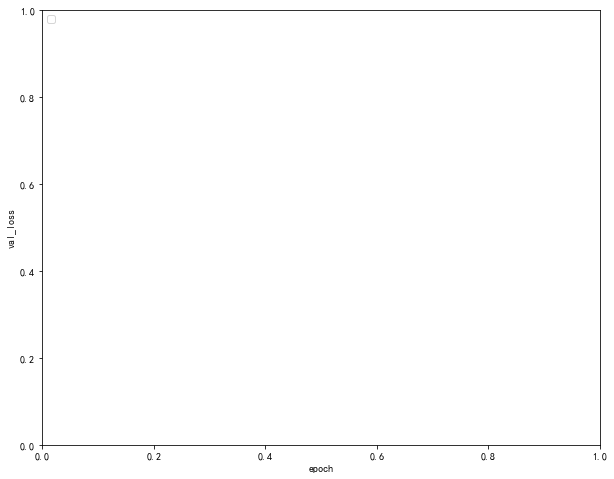

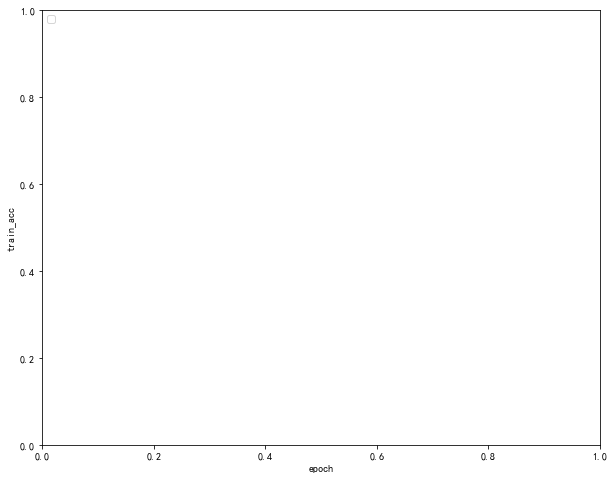

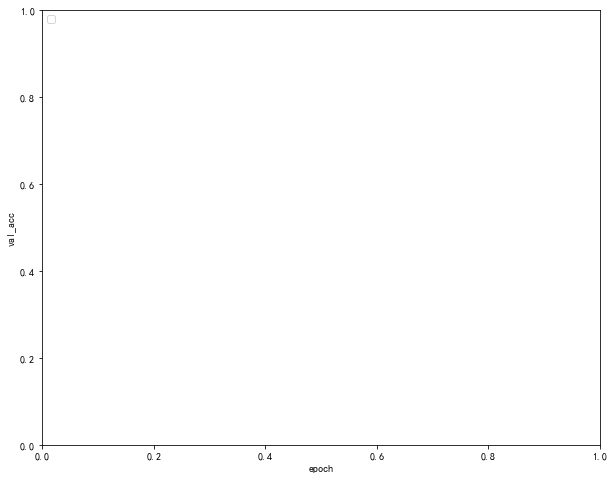

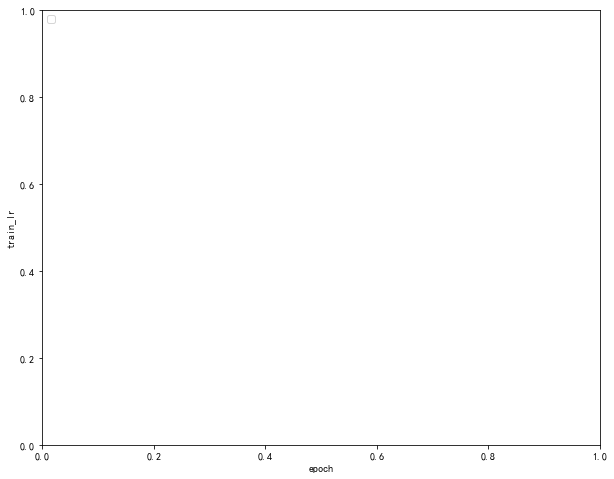

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend = ['train_r20_c10', 'train_r56_c10', 'train_r110_c10', 'train_r20_c100', 'train_r56_c100', 'train_r110_c100']

plt_different_history(history_main_task, legend)